
MatSoc: Intro to ML Techniques
Assignment 1
Deadline: Wednesday, 27 December 2023, 23:59 IST

Name:Anushka Gupta
Roll Number: 210174
IITK Email:anushkag21@iitk.ac.in

Part A:

I.

1. Plot x vs y scatter plot for the given dataset
2. Plot the histogram of the y values
3. Clean the data by removing outliers and nan value containing datapoints
4. Plot a histogram for y values before and after cleaning the data.
5. Split the data into train and test with 85% of the data used for training

II.

1. Implement the following function:

  def gradient_descent(x,y,alpha=learning_rate,epochs=number of iteratrions)

  The function should return two parameter values (a,b)
  corresponding to the model  ŷ=a*x+b

2. Plot the histogram with the residuals (y- ŷ) after model training for the
   original and predicted values

3. Plot the  ŷ vs x (line chart), preferrably on top of a y vs x scatter plot

  Note that the code for all of part A must be visible

  Preferrably use pandas for data cleaning and matplotlib for plotting

  Make sure all the code is run before you submit the notebook

Part B:

    1. Report the parameter values after training on the given data
       the target variable is 'y' and there is only one feature 'x'
    2. Report the MSE value for your model after training
    3. What do you think is the ideal ratio for train data if we are splitting
       the data into train and test datasets? Is the answer same irrespective of
       the size of the dataset? What percent would you take for training
       if your dataset has 1 feature, 1 target and 250 data points, what would
       you do if it had 10,000 data points instead of 250 data points

      Note that there is no single correct answer for part B

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("data.csv")
df

,Unnamed: 0,x,y
0,0,2,43.00
1,1,3,55.48
2,2,4,68.08
3,3,5,79.24
4,4,5,79.24
...,...,...,...
994,994,994,11948.08
995,995,996,11971.24
996,996,997,11984.08
997,997,998,11994.64


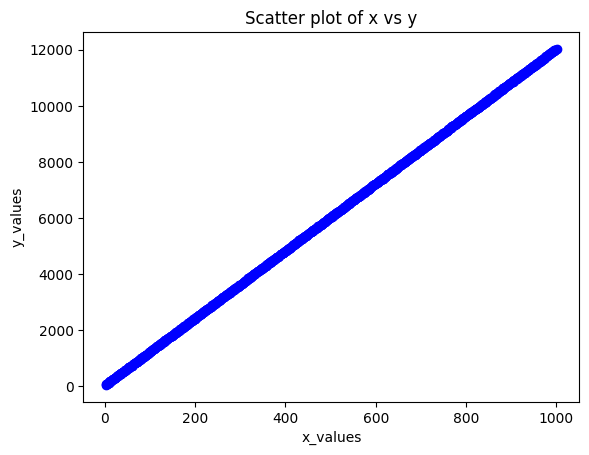

In [4]:
x_columns='x'
y_columns='y'

plt.scatter(df[x_columns], df[y_columns], marker='o', color='blue')
plt.title('Scatter plot of x vs y')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.show()


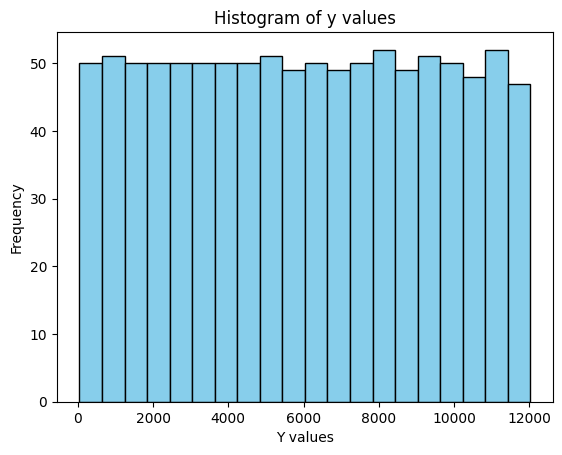

In [5]:
plt.hist(df[y_columns], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of y values')
plt.xlabel('Y values')  # Set label for x-axis
plt.ylabel('Frequency')  # Set label for y-axis
plt.show()

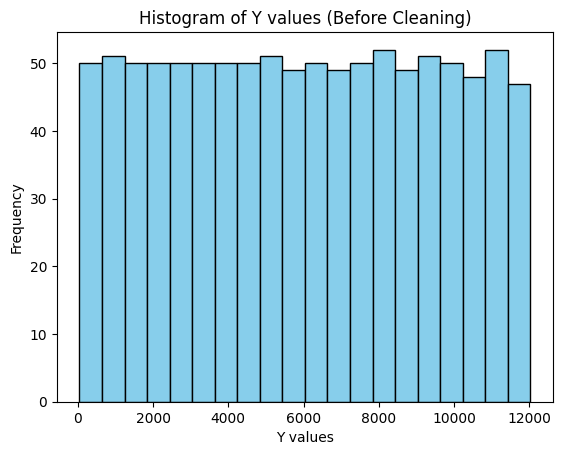

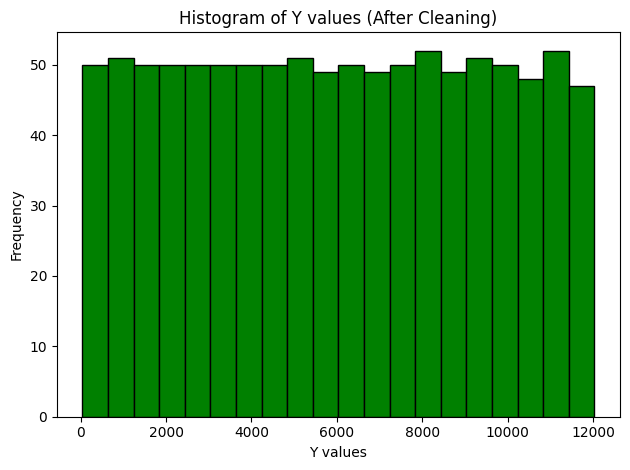

In [6]:
clean_data=df.dropna(subset=[y_columns])
mean_y=clean_data[y_columns].mean()
std_y=clean_data[y_columns].std()
clean_data=clean_data[(clean_data[y_columns] >= mean_y-3*std_y) & (clean_data[y_columns]<=mean_y+3*std_y)]


plt.hist(df[y_columns], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Y values (Before Cleaning)')
plt.xlabel('Y values')
plt.ylabel('Frequency')
plt.show()

# Plot histogram after cleaning

plt.hist(clean_data[y_columns], bins=20, color='green', edgecolor='black')
plt.title('Histogram of Y values (After Cleaning)')
plt.xlabel('Y values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split


x = clean_data.drop(columns=[y_columns])
y = clean_data[y_columns]

# Splitting the data into training and testing sets (85% for training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [7]:
def gradient_descent(x, y, alpha=0.01, epochs=1000):
    a = 0.0
    b = 0.0
    n = len(x)  # Number of elements in x

    for _ in range(epochs):
        y_pred = a * x + b
        grad_a = (-2 / n) * np.sum(x * (y.astype(np.float) - y_pred.astype(np.float)))
        grad_b = (-2 / n) * np.sum(y.astype(np.float) - y_pred.astype(np.float))

        a -= alpha * grad_a
        b -= alpha * grad_b

    return a, b



In [ ]:
a, b = gradient_descent(x.astype(np.float), y, alpha=0.01, epochs=1000)

# Calculate predicted values
y_pred = a * x.astype(np.float) + b

# Calculate residuals
residuals = y.astype(np.float) - y_pred

# Plot histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Scatter plot of y vs x
plt.figure(figsize=(8, 6))
plt.scatter(x, y.astype(np.float), color='blue', label='Actual')
plt.xlabel('X values')
plt.ylabel('Y values')

# Plot ŷ vs x (line chart)
plt.plot(x, y_pred, color='red', label='Predicted')
plt.legend()
plt.title('ŷ vs x and y vs x')
plt.show()

In [ ]:
a, b = gradient_descent(x.astype(np.float), y, alpha=0.01, epochs=1000)

# Calculate predicted values
y_pred = a * x.astype(np.float) + b

# Calculate Mean Squared Error (MSE)
mse = np.mean((y.astype(np.float) - y_pred) ** 2)

print(f"Parameter 'a' after training: {a}")
print(f"Parameter 'b' after training: {b}")
print(f"Mean Squared Error (MSE) after training: {mse}")

The ideal ratio for train-test split can vary based on factors like dataset size, model complexity, and the problem at hand. A common approach is to consider larger proportions for the training set to allow the model to learn from more data. For instance:

For a dataset with 250 data points, an 80-20 split (200 for training, 50 for testing) might be suitable.
However, for a larger dataset with 10,000 data points, a split like 90-10 (9,000 for training, 1,000 for testing) could also be considered.
This scaling ensures the model has enough data to learn from while still retaining a portion for testing.